# Step 1
visualize users' data on plot(s) and try to understand the scope of given data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
data_path = 'time_series_classification_data_20.json'
with open(data_path, 'r') as file:
    data = json.load(file)

user_data = []
for user, visits in data.items():
    for visit in visits:
        user_data.append({
            "user": user,
            "venue_type": visit["venue_type"],
            "timestamp": visit['ts']
        })
df = pd.DataFrame(user_data)
df


,user,venue_type,timestamp
0,user_0,pub,2023-11-20 18:56:47.486300
1,user_0,wine,2023-11-25 12:14:29.064639
2,user_0,bar,2023-11-30 15:06:45.823437
3,user_0,bar,2023-11-30 15:14:45.823437
4,user_0,bar,2023-11-30 15:21:45.823437
...,...,...,...
423,user_19,cafe,2023-12-01 07:47:12.336208
424,user_19,cafe,2023-12-05 20:07:22.628050
425,user_19,cafe,2023-12-05 20:14:22.628050
426,user_19,bar,2023-12-10 13:22:23.454842


## plot the number of visit per user

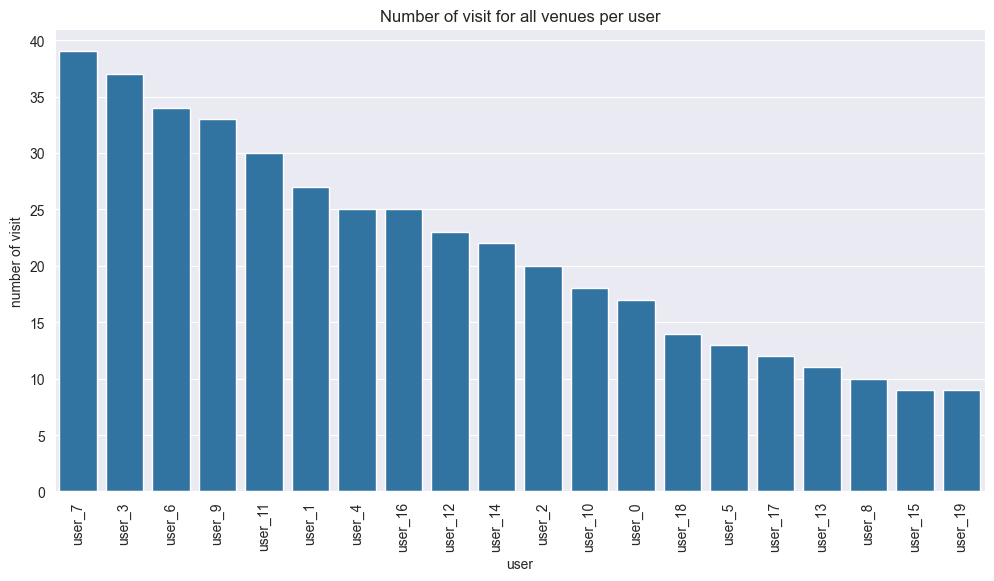

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='user', order=df['user'].value_counts().index)
plt.title('Number of visit for all venues per user')
plt.xlabel('user')
plt.ylabel('number of visit')
plt.xticks(rotation=90)
plt.show()

## Plot the number of visits per venue type

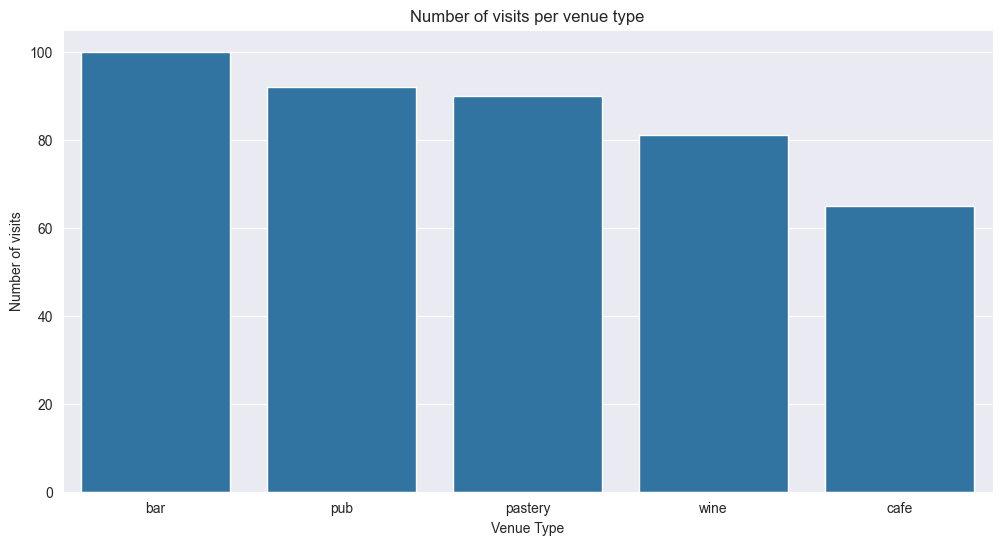

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='venue_type', order=df['venue_type'].value_counts().index)
plt.title('Number of visits per venue type')
plt.xlabel('Venue Type')
plt.ylabel('Number of visits')
plt.show()

## plot Venue Type Distribution per User

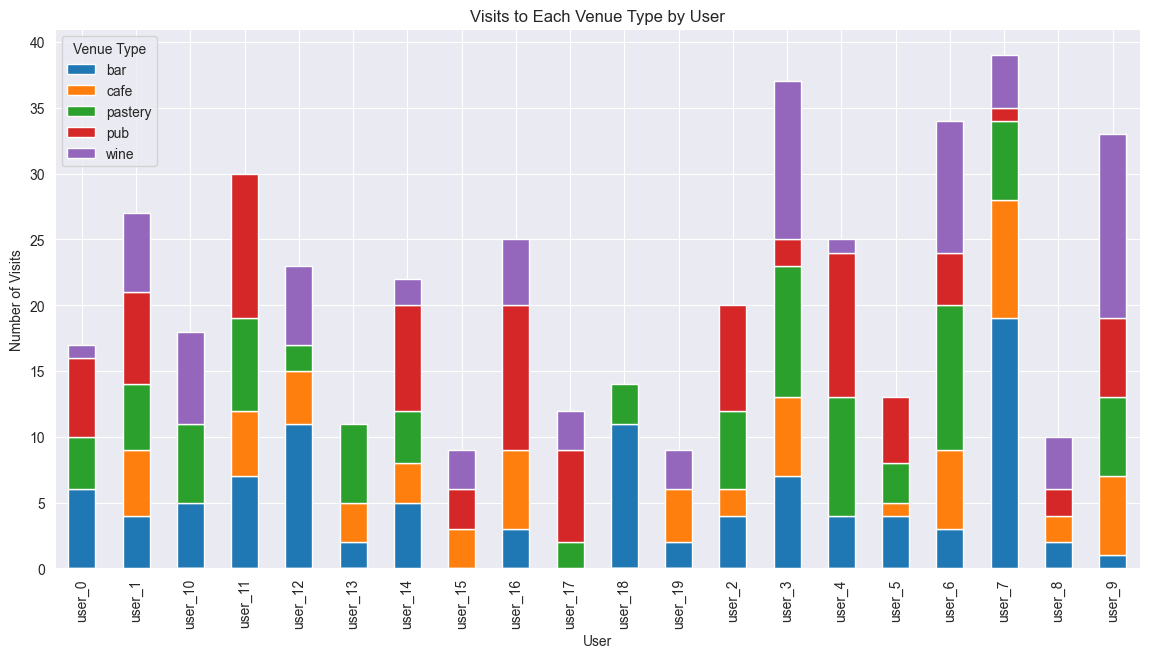

In [5]:
user_venue_counts = df.groupby(['user', 'venue_type']).size().unstack(fill_value=0)
user_venue_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Visits to Each Venue Type by User')
plt.xlabel('User')
plt.ylabel('Number of Visits')
plt.legend(title='Venue Type')
plt.xticks(rotation=90)
plt.show()


# Step 2
group users based on their visiting behavior of different types of venues and different datetime of a month.

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_month'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

user_day_counts = df.groupby(['user', 'day_of_month']).size().unstack(fill_value=0)
user_behavior = pd.concat([user_venue_counts, user_day_counts], axis=1).fillna(0)
user_behavior

,bar,cafe,pastery,pub,wine,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
user,,,,,,,,,,,,,,,,,,,,,
user_0,6,0,4,6,1,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,3
user_1,4,5,5,7,6,0,2,3,0,0,...,0,3,0,0,3,0,0,3,0,1
user_10,5,0,6,0,7,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
user_11,7,5,7,11,0,0,4,0,0,0,...,0,4,0,0,3,1,0,2,0,6
user_12,11,4,2,0,6,2,0,0,0,1,...,4,0,0,0,0,0,0,0,1,2
user_13,2,3,6,0,0,0,3,0,0,0,...,0,5,0,0,0,0,0,0,0,0
user_14,5,3,4,8,2,0,0,1,2,2,...,3,0,0,1,0,0,3,1,0,0
user_15,0,3,0,3,3,0,3,0,0,0,...,0,0,0,3,0,0,0,0,3,0
user_16,3,6,0,11,5,0,0,0,0,0,...,0,0,0,2,0,3,0,0,0,0


# Step 3
Cluster Users with Weighted Visits

In [7]:
import numpy as np
weeks = df['timestamp'].dt.isocalendar().week
max_week = weeks.max()
week_diff = max_week - weeks
df['week_weight'] = 1 - (week_diff / week_diff.max())
df['week_weight'] = df['week_weight'].clip(lower=0)

min_weight = 0.1
max_weight = 1.0

df['week_weight'] = min_weight + (df['week_weight'] * (max_weight - min_weight))

user_venue_weights = df.groupby(['user', 'venue_type'])['week_weight'].sum().unstack(fill_value=0)
user_venue_weights = user_venue_weights.div(user_venue_weights.sum(axis=1), axis=0)
print(user_venue_weights)

clusters = {}

for user in user_venue_weights.index:
    most_visited_venue = user_venue_weights.loc[user].idxmax()
    clusters[user] = most_visited_venue
    
clusters


venue_type       bar      cafe   pastery       pub      wine
user                                                        
user_0       0.35518       0.0  0.281184  0.336152  0.027484
user_1       0.16358  0.253086  0.141975  0.182099  0.259259
user_10     0.084444       0.0  0.373333       0.0  0.542222
user_11     0.250432  0.158895  0.234888  0.355786       0.0
user_12     0.430063  0.183716   0.05428       0.0  0.331942
user_13     0.266094  0.167382  0.566524       0.0       0.0
user_14     0.257903  0.124792  0.101498  0.412646  0.103161
user_15          0.0  0.385965       0.0   0.22807  0.385965
user_16     0.026608   0.35255       0.0  0.436807  0.184035
user_17          0.0       0.0  0.283688  0.578014  0.138298
user_18     0.669291       0.0  0.330709       0.0       0.0
user_19     0.299517  0.512077       0.0       0.0  0.188406
user_2      0.211447  0.127186  0.281399  0.379968       0.0
user_3      0.197107  0.092224  0.251356  0.112116  0.347197
user_4      0.202284    

{'user_0': 'bar',
 'user_1': 'wine',
 'user_10': 'wine',
 'user_11': 'pub',
 'user_12': 'bar',
 'user_13': 'pastery',
 'user_14': 'pub',
 'user_15': 'cafe',
 'user_16': 'pub',
 'user_17': 'pub',
 'user_18': 'bar',
 'user_19': 'cafe',
 'user_2': 'pub',
 'user_3': 'wine',
 'user_4': 'pub',
 'user_5': 'pub',
 'user_6': 'pastery',
 'user_7': 'bar',
 'user_8': 'cafe',
 'user_9': 'wine'}

# Step 4
Identify each user’s based on this, Sun lover / Moon Lover, Weekend lover / Weekday lover, Wine lover / Bar lover / Pub lover / Pastery lover / Coffee lover

In [8]:
def identify_user_preferences(df_group):
    df_group = df_group.reset_index(drop=True)
    day_pref = 'Sun lover' if df_group['hour'].mean() >= 12 else 'Moon lover'
    weekend_pref = 'Weekend lover' if df_group['timestamp'].dt.weekday.isin([5, 6]).mean() > 0.5 else 'Weekday lover'
    venue_counts = df_group['venue_type'].value_counts()
    venue_pref = venue_counts.idxmax() + ' lover'
    
    return pd.Series([day_pref, weekend_pref, venue_pref])

# Add hour column
df['hour'] = df['timestamp'].dt.hour

# Apply the function to each user group
user_prefs = df.groupby('user').apply(lambda x: identify_user_preferences(x[['timestamp', 'hour', 'venue_type']]), include_groups=False)
user_prefs.columns = ['Time Preference', 'Day Preference', 'Venue Preference']

# Display the final classifications
print(user_prefs)


        Time Preference Day Preference Venue Preference
user                                                   
user_0        Sun lover  Weekday lover        pub lover
user_1        Sun lover  Weekday lover        pub lover
user_10      Moon lover  Weekday lover       wine lover
user_11      Moon lover  Weekday lover        pub lover
user_12      Moon lover  Weekday lover        bar lover
user_13      Moon lover  Weekday lover    pastery lover
user_14       Sun lover  Weekday lover        pub lover
user_15      Moon lover  Weekday lover        pub lover
user_16      Moon lover  Weekday lover        pub lover
user_17       Sun lover  Weekday lover        pub lover
user_18       Sun lover  Weekday lover        bar lover
user_19      Moon lover  Weekend lover       cafe lover
user_2       Moon lover  Weekday lover        pub lover
user_3        Sun lover  Weekday lover       wine lover
user_4        Sun lover  Weekend lover        pub lover
user_5       Moon lover  Weekday lover        pu